# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import seaborn as sns
from sklearn import metrics

# Pretty display for notebooks
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [2]:
# The total number of records
data.shape[0]

45222

In [3]:
# The number of individuals making more than $50000 annually
sum(data['income']=='>50K')


11208

In [4]:
# The number of individuals making at most $50000 annually
sum(data['income']=='<=50K')

34014

In [5]:
# The percentage of individuals making at more than $50000 annually
'{:%}'.format(data['income'].value_counts(normalize=True)['>50K'])

'24.784397%'

利用values_counts()函数并选择归一化

### Exercise 2 Preprocessing 

<AxesSubplot:>

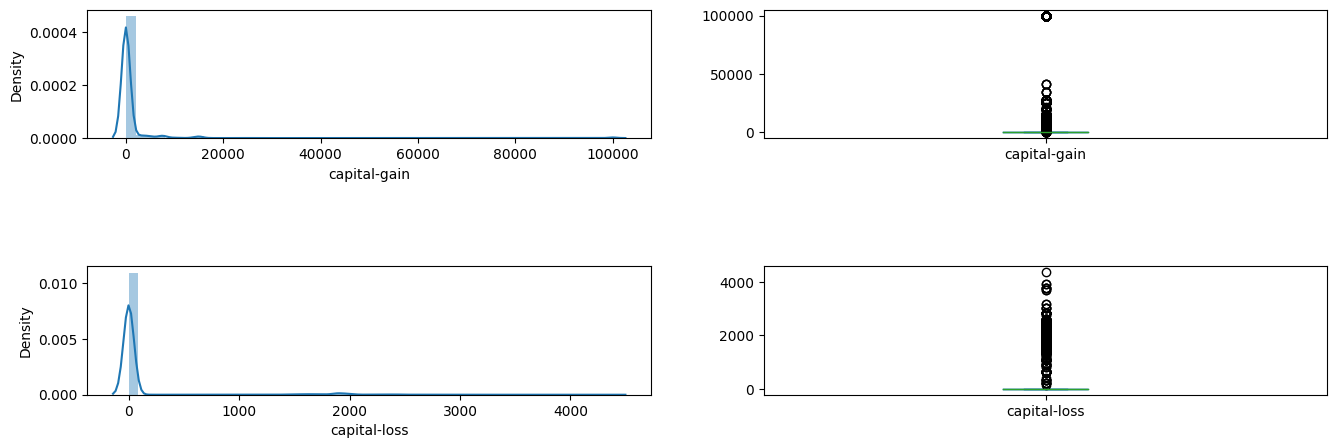

In [6]:
# Visualize skewed continuous features of original data
income = data['income']
features = data.drop('income', axis = 1)
features_number = features.select_dtypes(include=[np.number])
# The number of numeric features
numeric_features_count = features_number.shape[1]
plt.figure(1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)



plt.subplot(221)
sns.distplot(data['capital-gain']);
plt.subplot(222)
data['capital-gain'].plot.box(figsize=(16,5))

plt.subplot(223)
sns.distplot(data['capital-loss']);
plt.subplot(224)
data['capital-loss'].plot.box(figsize=(16,5))


    

**capital-gain**，大部分值分布在0附近，0-20000范围内，也有一些值分布在100000附近。而对于**capital-loss**，大部分数值分布在0附近。对于数值特征，其容易出现的问题之一就是分布的偏差和方差过大，也就是说当大部分数据分布在一个固定值周围时，也会出现很多特别大或者特别小的值。对于特征应用Z-Score方法除去离群点

In [7]:
# Outliers Treatment

import scipy.stats as stats
#log
features_log_transformed = data.copy()

features_log_transformed['capital-gain'] = data['capital-gain'].apply(lambda x: np.log(x + 1))
features_log_transformed['capital-loss'] = data['capital-loss'].apply(lambda x: np.log(x + 1))

#Z-Score approach
features_log_transformed['Z_capital-gain'] = stats.zscore(features_log_transformed['capital-gain'])
features_log_transformed['Z_capital-loss'] = stats.zscore(features_log_transformed['capital-loss'])
features_log_transformed= features_log_transformed[(features_log_transformed['Z_capital-gain']>-3) & (features_log_transformed['Z_capital-gain']<3)&(features_log_transformed['Z_capital-loss']>-3) & (features_log_transformed['Z_capital-loss']<3)].reset_index()
features_log_transformed = features_log_transformed.drop(['Z_capital-gain','Z_capital-loss','index'],axis = 1)
features_log_transformed.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba,<=50K


In [8]:
#  Data Transformation
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_log_MinMax_transformed = features_log_transformed.copy()
features_log_MinMax_transformed[numerical] = model.fit_transform(features_log_MinMax_transformed[numerical])
# encode the categorical data into dummy variables
features_log_MinMax_transformed = pd.get_dummies(features_log_MinMax_transformed, columns=['workclass','education_level', 'marital-status','occupation','relationship','race','native-country'])
#onehot encoding
from sklearn.preprocessing import LabelEncoder
features_log_MinMax_transformed['sex']=LabelEncoder().fit_transform(features_log_MinMax_transformed['sex'])
features_log_MinMax_transformed['income']=LabelEncoder().fit_transform(features_log_MinMax_transformed['income'])
features_log_MinMax_transformed.head()


,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,1,0.944413,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,1,0.000000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,1,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,1,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0,0.000000,0.0,0.397959,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Exercise 3 Shuffle and Split Data

In [9]:
#split the features 
from sklearn.model_selection import train_test_split
Y = features_log_MinMax_transformed['income']
X = features_log_MinMax_transformed.drop('income', axis = 1)
# Split the 'feature' and 'income' data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)


### Exercise 4 : A simple Model
What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000('accuracy' and 'f-score')

Accuracy中的参数在这个case中：

在这个简单模型中，只进行正例的的预测，因此TP为数据集中income大于$50,000的数据为正例。且该模型预测所有数据为正例，

TP:TP = sum(features_log_MinMax_transformed['income'])，因为在上面已经进行编码
FP:FP = features_log_MinMax_transformed['income'].count() - TP
TN:0
FN:0

In [10]:
#What would the accuracy and F-score be on this dataset if we chose a model that always predicted an individual made more than $50,000

TP_simple_Model = sum(features_log_MinMax_transformed['income'])
FP_simple_Model = features_log_MinMax_transformed['income'].count() - TP_simple_Model
TN_simple_Model = 0
FN_simple_Model = 0

ACC_simple_Mode = np.true_divide(TP_simple_Model + TN_simple_Model, TP_simple_Model + TN_simple_Model + FP_simple_Model + FN_simple_Model)

Precision_simple_Model = np.true_divide(TP_simple_Model, TP_simple_Model + FP_simple_Model)
Recall_simple_Model = np.true_divide(TP_simple_Model, TP_simple_Model + FN_simple_Model)
#choose beta as 1
F_score = np.true_divide(2 * (Precision_simple_Model * Recall_simple_Model), Recall_simple_Model + Precision_simple_Model)


### Exercise 5 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

选用Gaussian Naive Bayes,DecisionTree,Support Vector Machines三个模型进行评估

In [11]:
# Evaluating Model
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

Classifier_Model_A = GaussianNB()
Classifier_Model_B = DecisionTreeClassifier(random_state=0)
Classifier_Model_C = SVC(kernel = 'rbf')

Classifier_Model_A.fit(X_train, Y_train)
Classifier_Model_B.fit(X_train, Y_train)
Classifier_Model_C.fit(X_train, Y_train)

Y_prediction_Model_A = Classifier_Model_A.predict(X_test)
Y_prediction_Model_B = Classifier_Model_B.predict(X_test)
Y_prediction_Model_C = Classifier_Model_C.predict(X_test)



Visualization-ROC曲线

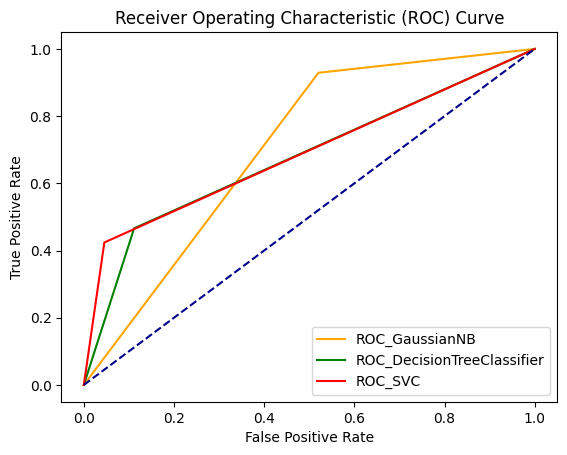

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
fper_GaussianNB, tper_GaussianNB, thresholds_GaussianNB = metrics.roc_curve(Y_test, Y_prediction_Model_A)
fper_DecisionTreeClassifier, tper_DecisionTreeClassifier, thresholds_DecisionTreeClassifier = metrics.roc_curve(Y_test, Y_prediction_Model_B)
fper_SVC, tper_SVC, thresholds_SVC = metrics.roc_curve(Y_test, Y_prediction_Model_C)

plt.plot(fper_GaussianNB, tper_GaussianNB, color='orange', label='ROC_GaussianNB')
plt.plot(fper_DecisionTreeClassifier, tper_DecisionTreeClassifier, color='green', label='ROC_DecisionTreeClassifier')
plt.plot(fper_SVC, tper_SVC, color='red', label='ROC_SVC')

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


## Question:
### Q1:

In [13]:
from sklearn.ensemble import AdaBoostClassifier

Model_A = AdaBoostClassifier()
Model_B = DecisionTreeClassifier(random_state=0)
Model_A.fit(X_train, Y_train)
Model_B.fit(X_train, Y_train)
importances_Model_A = Model_A.feature_importances_
importances_Model_B = Model_B.feature_importances_
#add new col

data_importances_A= pd.DataFrame([dict(zip(X_train.keys(), importances_Model_A))])
data_importances_B= pd.DataFrame([dict(zip(X_train.keys(), importances_Model_B))])

data_importances = pd.concat([data_importances_A,data_importances_B],ignore_index=True)



### Visualization of importance of features-AdaBoostClassifier

<AxesSubplot:>

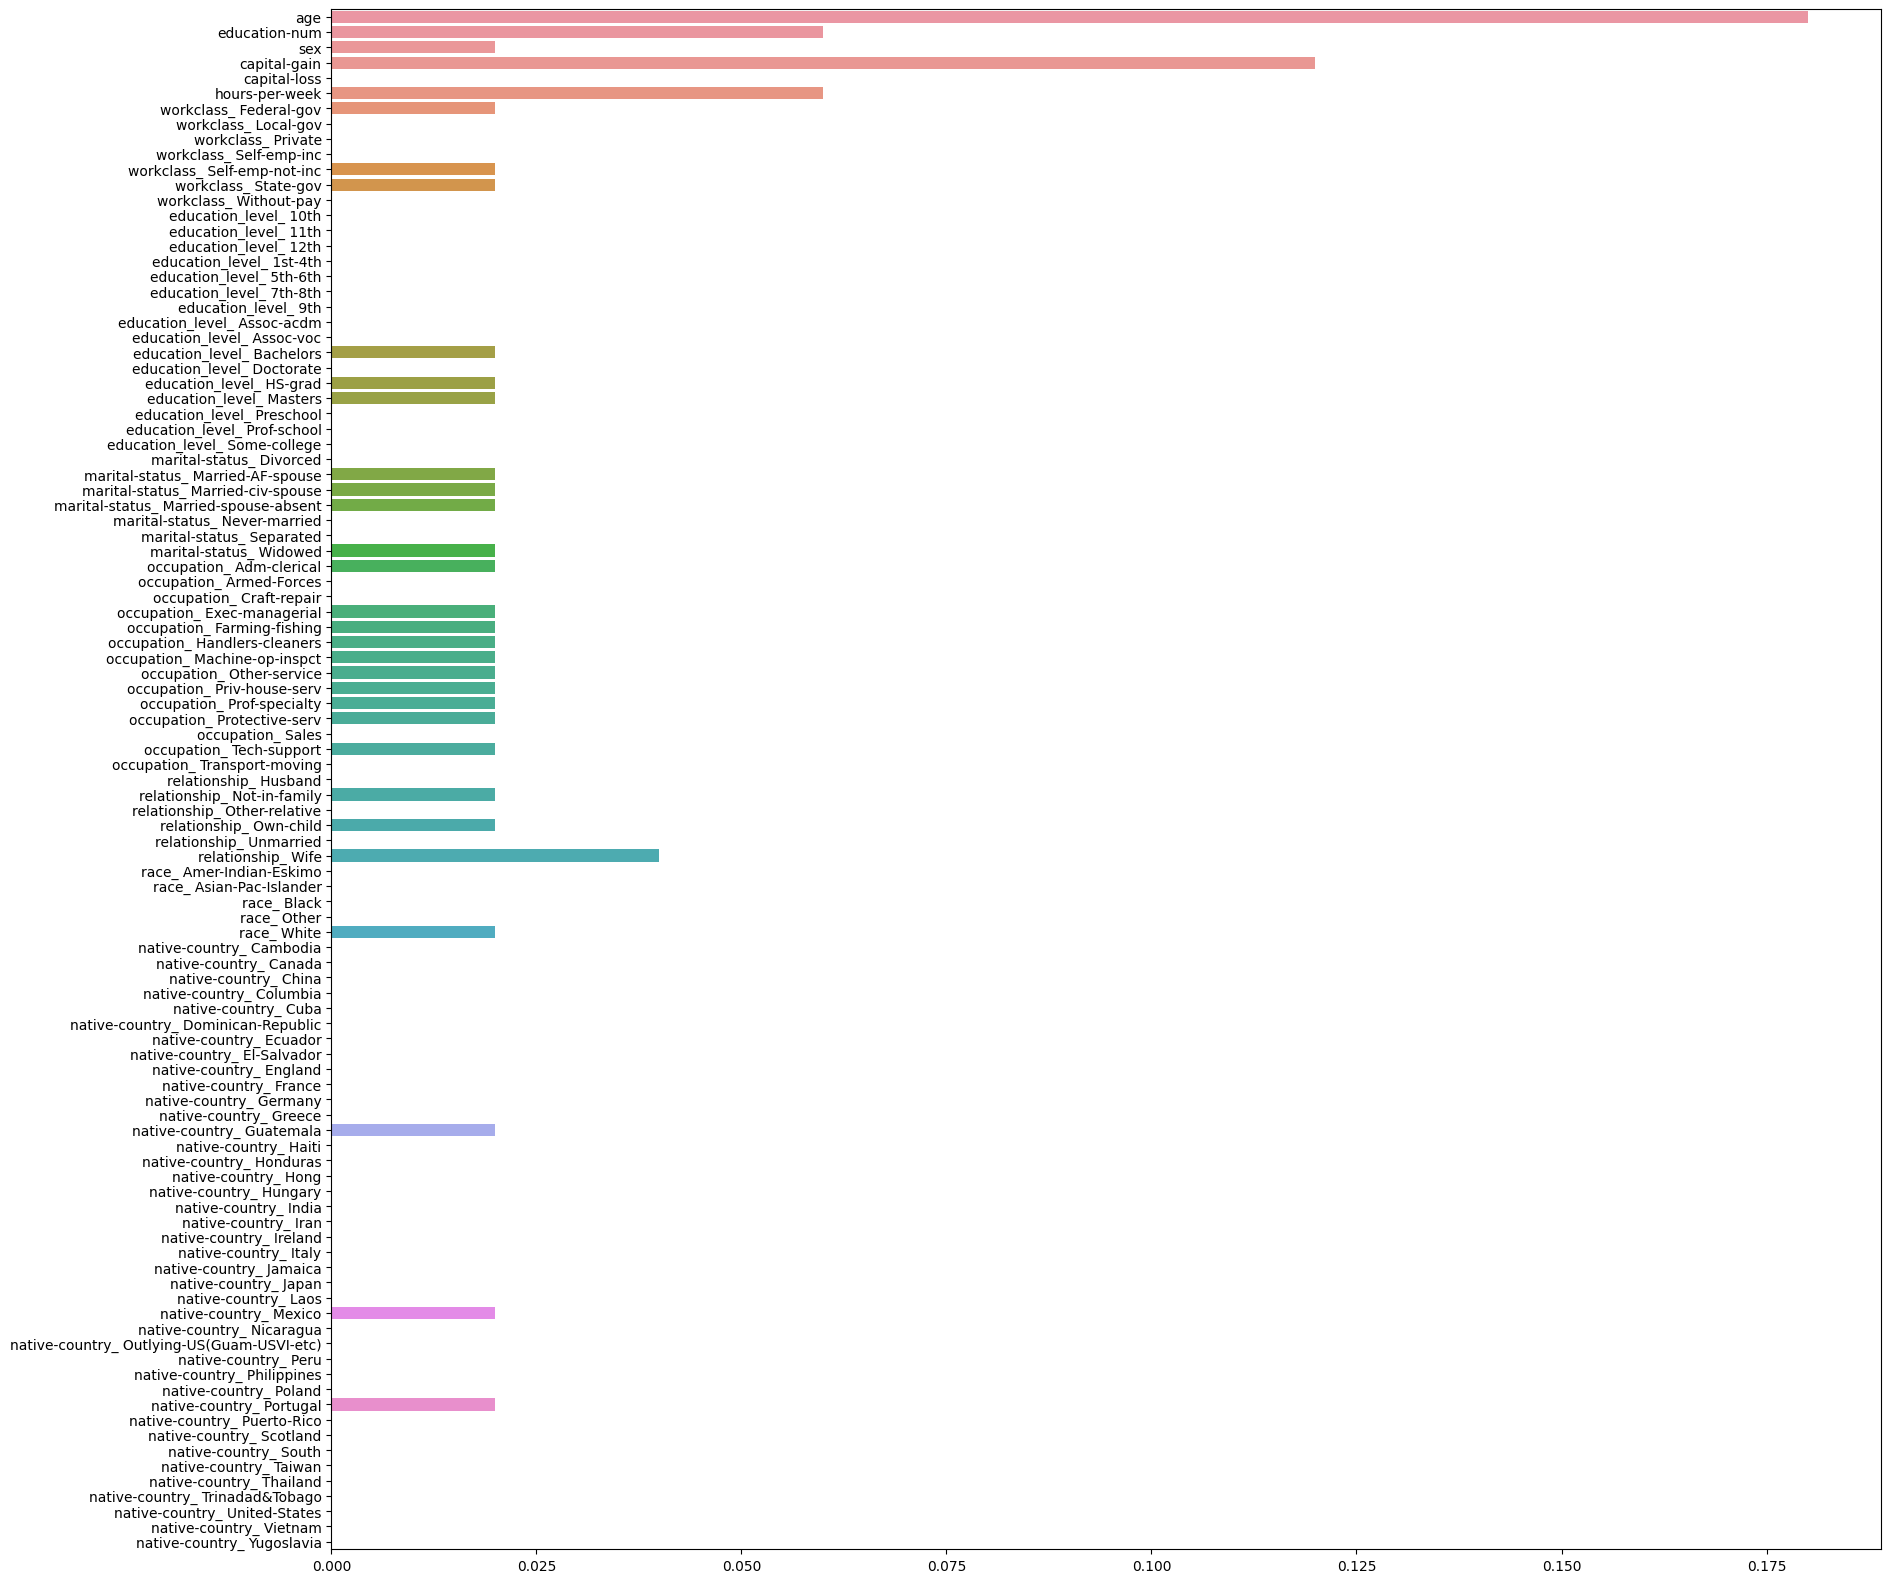

In [14]:
plt.figure(figsize=(20, 20))
sns.barplot(data = data_importances_A, orient = 'h')

### Visualization of importance of features-GradientBoostingClassifier

<AxesSubplot:>

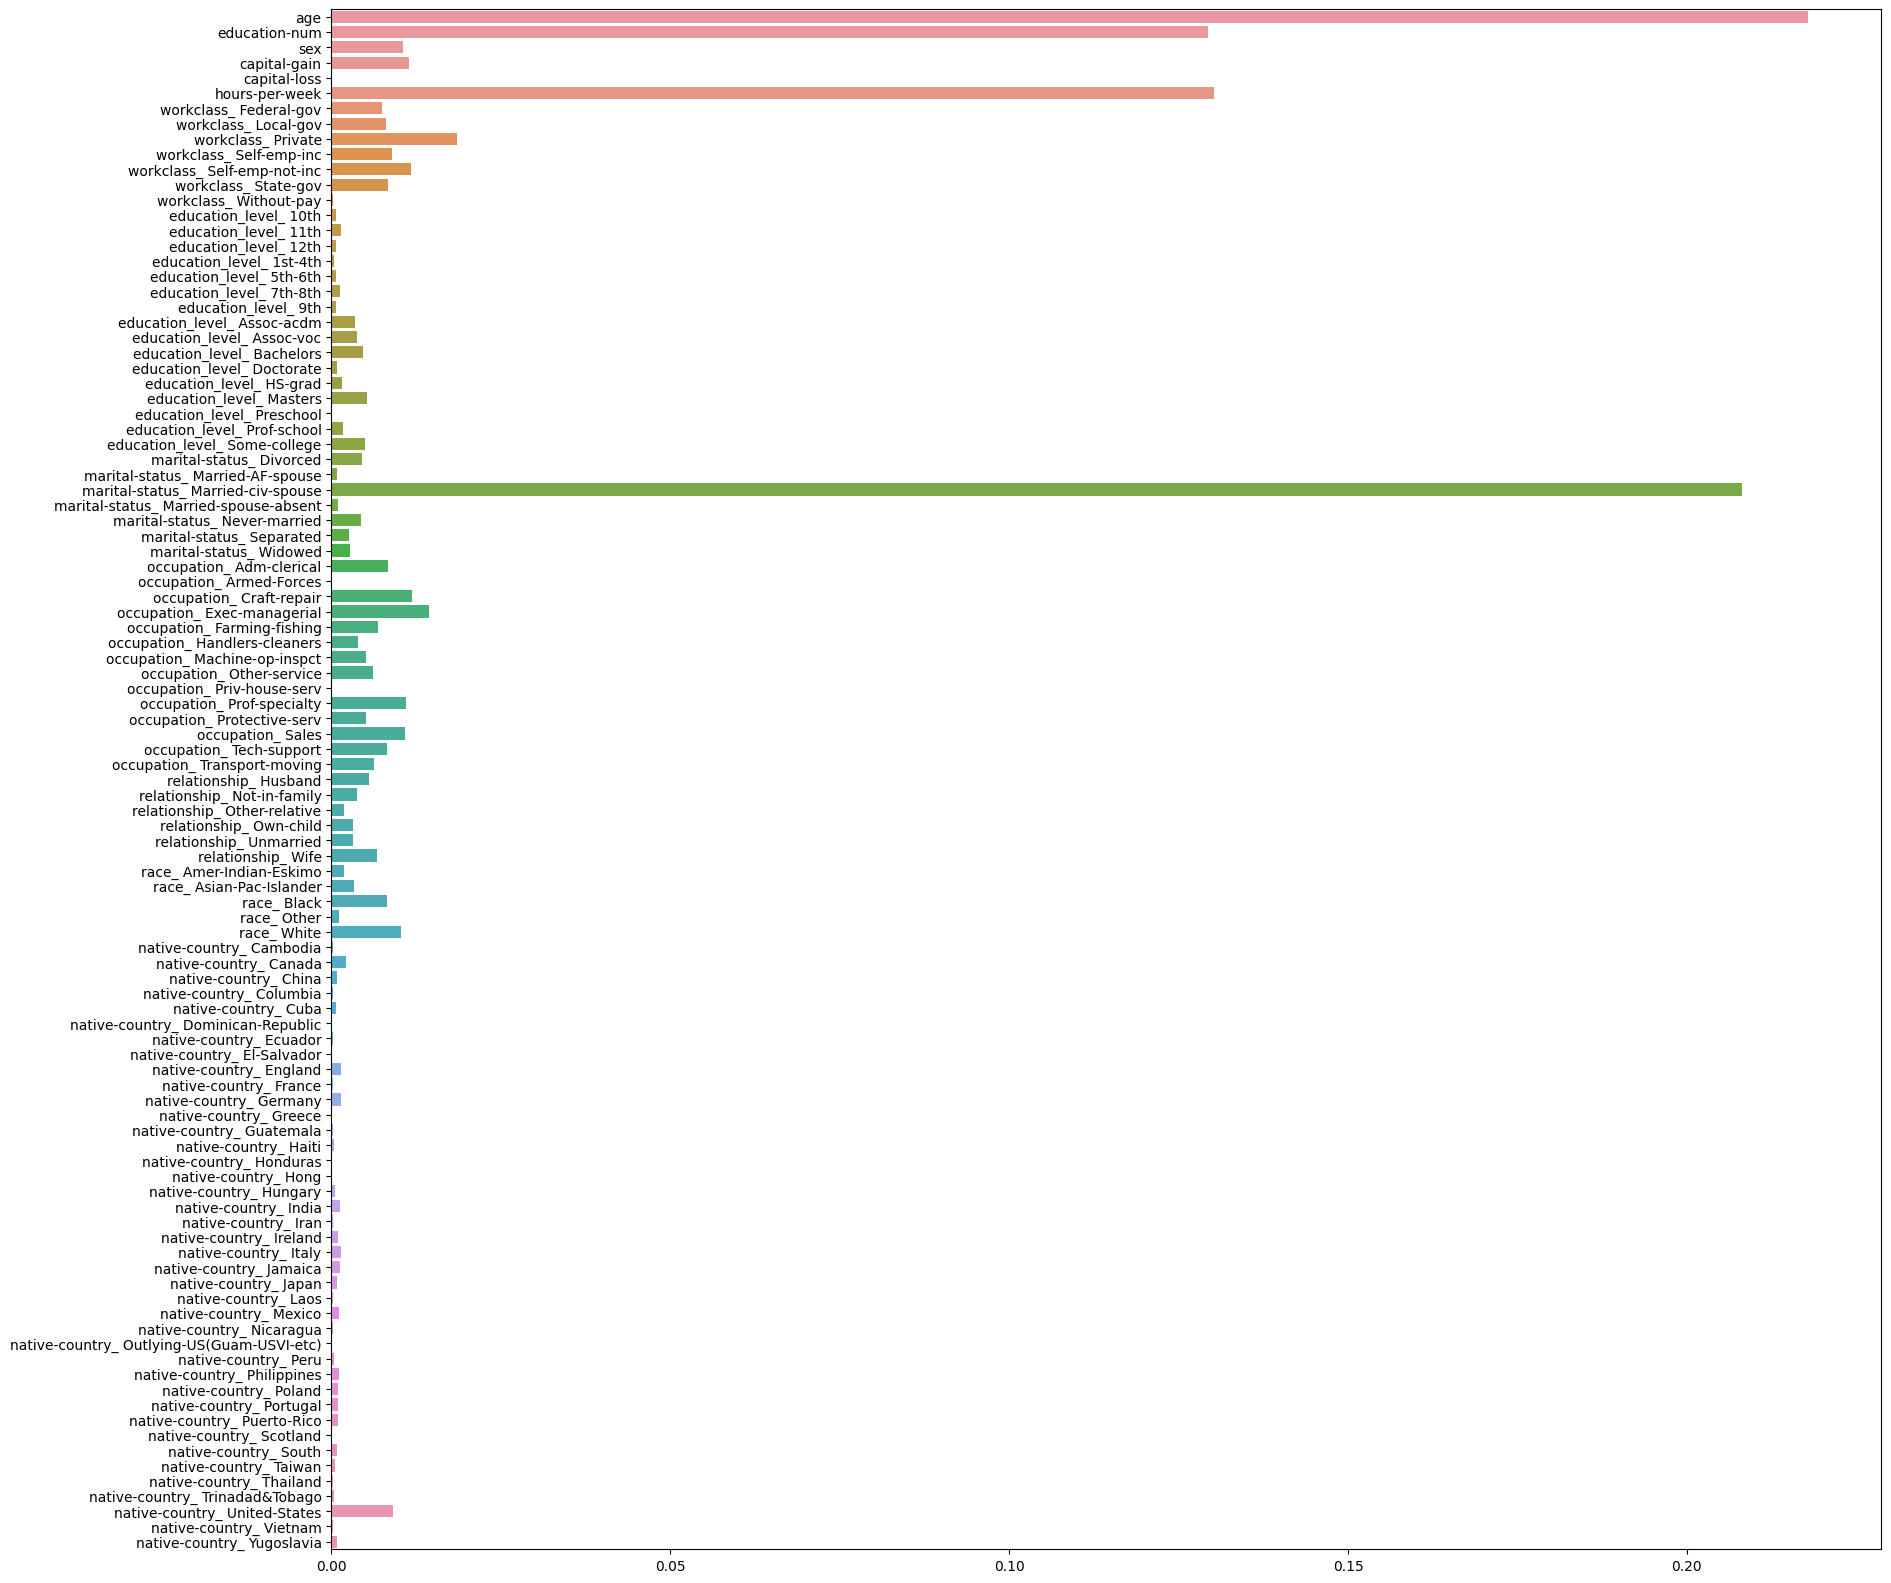

In [15]:
plt.figure(figsize=(20, 20))
sns.barplot(data = data_importances_B, orient = 'h')

### Q2:
    例如通过决策树模型，通过客户历史数据，数据判断哪些客户是好客户，哪些客户是坏客户，他们都有什么共性和异性，建模分析后，如果新客户申请时，根据授权填写的各项信息，进行判断此客户是好客户还是坏客户，应不应该放款。
    
### Q3:
    1.树形状结构非常适合处理特征为离散型随机变量的问题，对于非离散型变量可以区间化转为离散型。其最大的特点是可解释性非常高，能够直接产出预测标签的决策路径浅层的决策树视觉上非常直观
    2.对数据的结构和分布不需作任何假设
    3.可以捕捉住变量间的相互作用(Interaction)能够处理数值型数据和分类数据，其他的技术通常只能用来专门分析某一种的变量类型的数据集；
    4.训练需要的数据少，其他机器学习模型通常需要数据规范化，比如构建虚拟变量和移除缺失值。

### Q4:
    深层的决策树视觉上和解释上都比较困难；决策树容易过分微调于样本数据而失去稳定性和抗震荡性；决策树对样本量(Sample Size)的需求比较大，处理缺失值的功能非常有限。决策树模型容易产生一个过于复杂的模型，这样的模型对数据的泛化性能会很差。

### Q5:
    1.数据量比较小，且数据中不存在空值
    2.具有多个离散特征
    3.对于该预测收入问题，决策树模型的可解释性，使得模型输出的决策结果具有可参考性
    